In [1]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Akash\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df = pd.read_csv('D:/AIMT\Sem 2/AML 2404/Dataset/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('D:/AIMT/Sem 2/AML 2404/Dataset/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [5]:
labels = train_df['label'].values

In [6]:
print("Missing values:\n", train_df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", train_df.duplicated().sum())

Missing values:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Duplicate rows: 0


In [7]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = labels.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 5)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k],cmap='gray')
            ax[i,j].set_title(str(unique_labels[labels[k]]))
            k = k+1;
#     plt.axis('off')
    plt.tight_layout()
    

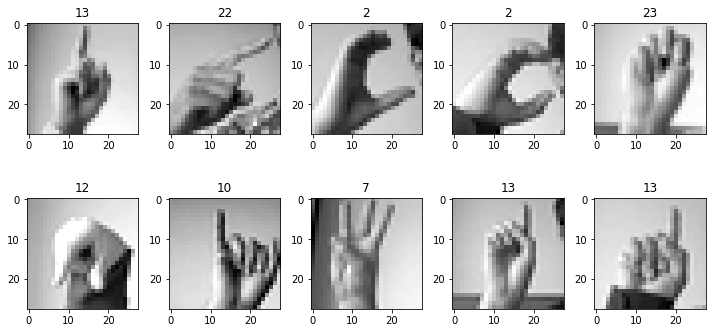

In [8]:
show_images(train_df.drop(columns='label'), train_df['label'])

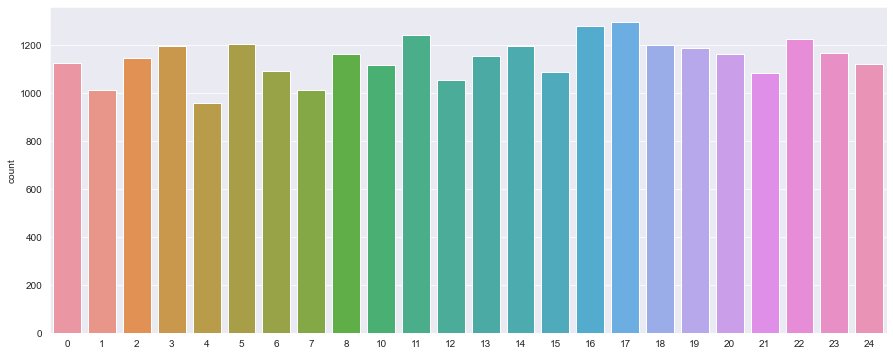

In [9]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=labels)
plt.show()

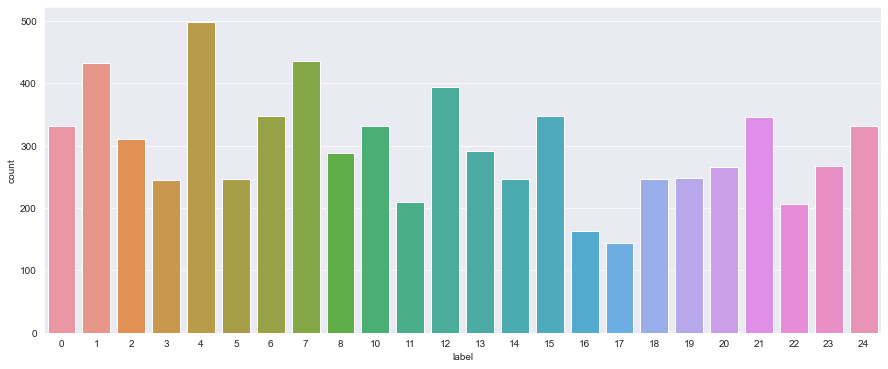

In [10]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=test_df['label'])
plt.show()

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
train_df.drop('label',axis=1,inplace=True)

In [13]:
images =  train_df.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [14]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [15]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
plt.rcParams["axes.grid"] = False

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


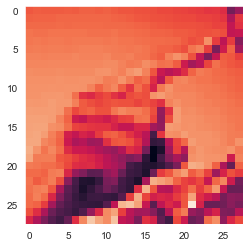

In [17]:
index = 1
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Use openCV to view 10 random images from our training data

import cv2
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im =  images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Image",sample)
    cv2.waitKey()
    
cv2.destroyAllWindows()

In [20]:
#split data into X_train, X_test, y_train and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.3, random_state=101)

In [21]:
# Start Loading our tensorflow modules and define our batch size etc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
batch_size =128
num_classes = 24
epochs = 10

In [23]:
#Scale our images
X_train = X_train/255
X_test = X_test/255

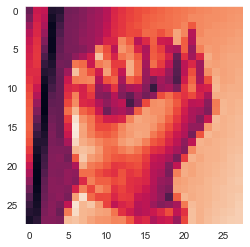

In [24]:
#Reshape them into the size required by TF and Keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

plt.imshow(X_train[0].reshape(28,28))

In [25]:
# Create our CNN Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))

model.add(Dense (num_classes, activation = 'softmax'))

In [26]:
#Compile Model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(), metrics= ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [28]:
#Train model

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 11s 68ms/step - loss: 2.5926 - accuracy: 0.2009 - val_loss: 1.6071 - val_accuracy: 0.5175
Epoch 2/10
151/151 [==============================] - 10s 68ms/step - loss: 1.2641 - accuracy: 0.5816 - val_loss: 0.7812 - val_accuracy: 0.7528
Epoch 3/10
151/151 [==============================] - 10s 69ms/step - loss: 0.7440 - accuracy: 0.7476 - val_loss: 0.5058 - val_accuracy: 0.8365
Epoch 4/10
151/151 [==============================] - 13s 89ms/step - loss: 0.4886 - accuracy: 0.8366 - val_loss: 0.3215 - val_accuracy: 0.9023
Epoch 5/10
151/151 [==============================] - 13s 89ms/step - loss: 0.3414 - accuracy: 0.8847 - val_loss: 0.2009 - val_accuracy: 0.9467
Epoch 6/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2412 - accuracy: 0.9227 - val_loss: 0.1351 - val_accuracy: 0.9660
Epoch 7/10
151/151 [==============================] - 12s 79ms/step - loss: 0.1702 - accuracy: 0.9464 - val_loss: 0.0935 - val_accuracy:

In [29]:
model.save("sign_mnist_cnn_10_epochs.h5")
print("Model Saved")

Model Saved


C:\Users\Akash\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


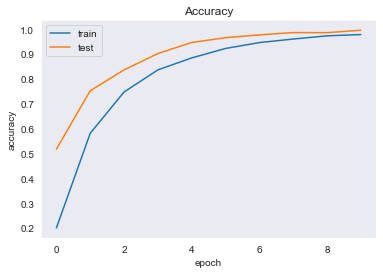

In [30]:
# View our training history graphically 

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [31]:
# Reshape our test data so that we can evaluate it's performance on unseen data 
test_labels = test_df['label']
test_df.drop('label', axis= 1, inplace=True)
test_images = test_df.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 10ms/step


In [32]:
# Get our accuracy score I
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7667317345231456

In [33]:
# Create function to match label to letter 
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: '0',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res =  int(result)
        return classLabels[res]
    except:
        return "Error"

## Test on Actual Webcam Input

In [34]:
import tensorflow as tf
model = tf.keras.models.load_model('sign_mnist_cnn_10_epochs.h5')

In [35]:
import cv2
import numpy as np
cap= cv2.VideoCapture (0)
while True:
    ret, frame = cap.read()
    ##############################
    frame=cv2.flip(frame, 1)
    #define region of interest 
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1)
    result = model.predict(roi)
    predicted_class = np.argmax(result)
#     result = str(model.predict_classes(roi, 1, verbose = 0)[0])
#     cv2.putText(copy, getLetter (result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2) 
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: 

Performance is very low. Not able to any alphabet.
So now going to use large dataset which have more alphabet images.

## let's Use Keras's Data Augmentation to enhance our dataset

In [12]:
import tensorflow.keras
from tensorflow.keras. preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [19]:
batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [20]:
train_path = 'ASL_Dataset/train'
val_path = 'ASL_Dataset/val'

In [21]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [22]:
train_data = datagen.flow_from_directory(directory= train_path, 
                                         target_size=(image_size,image_size), 
                                         batch_size = batch, 
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path, 
                                       target_size=(image_size,image_size), 
                                       batch_size = batch, 
                                       class_mode='categorical',
                                       shuffle= False
                                       )

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [23]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 64)      36928     
                                                      

In [24]:
early_stoping = EarlyStopping(monitor='val_loss', 
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True, 
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience = 2, 
                                         factor=0.5 , 
                                         verbose = 1)

In [25]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [26]:
asl_class = model.fit(train_data, 
                      validation_data= val_data, 
                      epochs=30, 
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 226s 4s/step - loss: 2.1672 - accuracy: 0.3956 - val_loss: 0.6527 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 232s 4s/step - loss: 0.6165 - accuracy: 0.8191 - val_loss: 0.3228 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 217s 3s/step - loss: 0.3122 - accuracy: 0.8981 - val_loss: 0.2206 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 221s 4s/step - loss: 0.1836 - accuracy: 0.9379 - val_loss: 0.1984 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 229s 4s/step - loss: 0.1248 - accuracy: 0.9553 - val_loss: 0.1983 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 219s 3s/step - loss: 0.0987 - accuracy: 0.9717 - val_loss: 0.2330 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.0882 -

## Now let's test the model

In [27]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 98.55864644050598
The Loss of the model for training data is: 0.03443390503525734
The accuracy of the model for validation data is: 93.24055910110474
The Loss of the model for validation data is: 0.1984224021434784


In [28]:
model_json = model.to_json()
with open("sign_asl_cnn_30_epochs.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save('sign_asl_cnn_30_epochs.h5')
model.save_weights('model-sign_asl_cnn_30_epochs_weight.h5')
print('Weights saved')

Model Saved


C:\Users\Akash\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Weights saved


In [23]:
from tensorflow.keras.models import load_model

classifier = load_model('sign_asl_cnn_30_epochs.h5')

In [25]:
import cv2
import numpy as np

# Load a pre-trained classifier or model for making predictions
# Replace 'classifier' with your actual model or classifier

cap = cv2.VideoCapture(0)
def classes(result):
    class_labels = {i: str(i) if i < 10 else chr(65 + i - 10) for i in range(36)}
    return class_labels[result]

# class_labels = {0:'0', 1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',
#                14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',
#                28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}
while True:
    
    
    ret, frame = cap.read()
    
    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)
    
    # Define region of interest
    roi = frame[100:300, 320:520]  # Adjust the ROI dimensions (200x200)
    
    cv2.imshow('roi', roi)
    
    # Convert ROI to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Resize ROI to (200, 200) and convert it to 3 channels
    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_AREA)
    roi = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
    
    # Scale the pixel values to the range [0, 1]
    roi = roi / 255.0
    
    cv2.imshow('roi scaled and color', roi)
    
    copy = frame.copy()
    
    cv2.rectangle(copy, (320, 100), (520, 300), (255, 0, 0), 5)
    
    # Reshape ROI for prediction
    roi = roi.reshape(1, 200, 200, 3)  # Ensure it matches your model's input shape
    
    predictions = classifier.predict(roi)
    print("Prediction", predictions)
    
    predicted_class = int(np.argmax(predictions, axis=1)[0])
    
    result = classes(predicted_class)
    
    cv2.putText(copy, str(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 113ms/step
Prediction [[1.6983815e-02 6.8406905e-03 4.3428447e-03 1.5412323e-03 3.9295652e-03
  4.0097674e-03 4.0866681e-03 3.6860812e-03 5.2738376e-03 6.3933071e-04
  2.0273526e-03 7.8505679e-04 6.8263407e-03 1.3104097e-03 1.1749261e-03
  4.2261616e-03 1.7882079e-02 2.4934544e-03 2.3280382e-03 7.8426290e-01
  5.0465590e-03 1.9010310e-03 7.2414512e-03 3.7335795e-03 1.3853693e-03
  7.1319228e-04 3.1205196e-02 7.2237551e-03 1.1298707e-03 1.6976823e-03
  5.6871171e-03 4.4014584e-03 2.9742303e-03 1.0823256e-03 4.2626340e-02
  7.3002791e-03]]
1/1 [==============================] - 0s 107ms/step
Prediction [[1.7751561e-02 7.3240772e-03 4.6778149e-03 1.6943410e-03 4.2822370e-03
  4.3680961e-03 4.4338317e-03 4.0493212e-03 5.7031624e-03 7.1926747e-04
  2.2438955e-03 8.8202290e-04 7.3054791e-03 1.4591527e-03 1.2933284e-03
  4.5768307e-03 1.9085256e-02 2.7417126e-03 2.5536544e-03 7.7093172e-01
  5.4620942e-03 2.0948772e-03 7.8480877e-03 4.0620384e-03 1.53

1/1 [==============================] - 0s 100ms/step
Prediction [[1.4691869e-02 5.8275233e-03 3.5916814e-03 1.2256267e-03 3.2875228e-03
  3.2854241e-03 3.3890812e-03 3.1304506e-03 4.4163503e-03 4.9216946e-04
  1.6359482e-03 6.1844965e-04 5.6242910e-03 1.0495650e-03 9.1552502e-04
  3.5420272e-03 1.5825223e-02 2.0426547e-03 1.8821334e-03 8.1572902e-01
  4.2815823e-03 1.5127176e-03 6.2065138e-03 3.0476870e-03 1.0994659e-03
  5.5908272e-04 2.7222788e-02 6.2766569e-03 8.8610529e-04 1.3569149e-03
  4.7711073e-03 3.6640721e-03 2.4440405e-03 8.6829631e-04 3.7474673e-02
  6.1257412e-03]]
1/1 [==============================] - 0s 98ms/step
Prediction [[1.46573465e-02 5.81422634e-03 3.55956028e-03 1.21879310e-03
  3.29590496e-03 3.29057523e-03 3.40544479e-03 3.10391770e-03
  4.41045640e-03 4.93593805e-04 1.61666330e-03 6.20226958e-04
  5.67097496e-03 1.04258943e-03 9.16061923e-04 3.54263093e-03
  1.56857930e-02 2.02230178e-03 1.86423329e-03 8.17185998e-01
  4.27485257e-03 1.51565426e-03 6.2367906

1/1 [==============================] - 0s 87ms/step
Prediction [[0.01760577 0.00807786 0.00551898 0.00197579 0.00509571 0.00514579
  0.00522314 0.00468791 0.00790213 0.00105427 0.00287369 0.00116733
  0.00725192 0.00173181 0.00149033 0.00623805 0.0276649  0.00313656
  0.00343604 0.73772377 0.00499995 0.00224212 0.00833423 0.00448785
  0.00160088 0.001191   0.03057173 0.00892991 0.00157825 0.00198801
  0.00683248 0.00559167 0.00411703 0.00171127 0.05160983 0.00921208]]
1/1 [==============================] - 0s 89ms/step
Prediction [[0.022732   0.01077985 0.0069137  0.00285614 0.00642766 0.00649294
  0.00660629 0.00609881 0.00866845 0.00133584 0.00366021 0.00159358
  0.01035377 0.00250794 0.00216098 0.00719837 0.02592611 0.00435009
  0.00421568 0.6858849  0.00756495 0.00335757 0.01113983 0.00630189
  0.00249289 0.00143804 0.03708909 0.01088505 0.00218453 0.00303427
  0.00902003 0.00714302 0.00507659 0.00209479 0.05289867 0.01151545]]
1/1 [==============================] - 0s 92ms/step
Pr

1/1 [==============================] - 0s 100ms/step
Prediction [[0.01520136 0.01023986 0.00492817 0.00161753 0.00486954 0.0066084
  0.00441406 0.00455598 0.00874017 0.00108207 0.00429373 0.00123999
  0.01043445 0.00171073 0.00153984 0.0058023  0.03703009 0.00426007
  0.00408624 0.6708269  0.00454252 0.00217663 0.01019922 0.00656929
  0.00122562 0.00080375 0.0373864  0.00657042 0.00174384 0.00175584
  0.00742653 0.00656679 0.0037697  0.00133447 0.09548414 0.00896334]]
1/1 [==============================] - 0s 90ms/step
Prediction [[0.0138833  0.00857075 0.00410249 0.00149246 0.0039     0.00500904
  0.00379411 0.00388686 0.00808402 0.00097156 0.00310147 0.00109884
  0.00808299 0.00140467 0.00122181 0.00540031 0.03109371 0.00312278
  0.00332567 0.725595   0.00372869 0.00179196 0.00896123 0.0054175
  0.00101694 0.00072585 0.02633262 0.00607861 0.00147363 0.00150088
  0.0057825  0.00489831 0.00330884 0.00112974 0.08278198 0.00792892]]
1/1 [==============================] - 0s 81ms/step
Pre

1/1 [==============================] - 0s 87ms/step
Prediction [[0.03050756 0.02092987 0.01538622 0.00591349 0.01258852 0.01016699
  0.01208675 0.01267849 0.01728073 0.00309371 0.00933742 0.00347912
  0.01453862 0.00508104 0.00462634 0.01283035 0.04418161 0.00968843
  0.01039387 0.44189385 0.01254114 0.00665944 0.01460166 0.01228008
  0.00494556 0.00401259 0.06658858 0.01653696 0.00419291 0.00626313
  0.01761105 0.01194193 0.0107254  0.00568498 0.08759907 0.02113256]]
1/1 [==============================] - 0s 82ms/step
Prediction [[0.03148298 0.02015105 0.01296452 0.00675856 0.01462979 0.01376294
  0.01184956 0.01224282 0.01574816 0.00329024 0.00964771 0.00389004
  0.02029771 0.005755   0.00546882 0.0147249  0.03635621 0.01026055
  0.00884093 0.4703495  0.01490934 0.00772838 0.02036199 0.01125526
  0.00571312 0.00388476 0.04886786 0.0198325  0.00501351 0.00743995
  0.01953868 0.01411677 0.00956725 0.00462794 0.06160779 0.0170629 ]]
1/1 [==============================] - 0s 84ms/step
Pr

1/1 [==============================] - 0s 82ms/step
Prediction [[0.02476948 0.0110077  0.00708982 0.00300327 0.00693826 0.00727578
  0.00699591 0.00588889 0.00937913 0.00147513 0.00381144 0.00169937
  0.01211332 0.00255931 0.00232074 0.0073746  0.02583235 0.00455597
  0.00420822 0.6733705  0.00768938 0.00370506 0.0119494  0.00664206
  0.00274841 0.00144218 0.03803964 0.01040254 0.00238137 0.00309646
  0.009121   0.00750628 0.00498899 0.00218609 0.05506121 0.01137072]]
1/1 [==============================] - 0s 81ms/step
Prediction [[0.02464405 0.01098415 0.0071178  0.00297783 0.00695577 0.0072764
  0.0070188  0.00588245 0.00937819 0.001489   0.00381242 0.00170346
  0.01206117 0.00253448 0.00231873 0.00739005 0.02604341 0.00457003
  0.00423201 0.6739631  0.00772631 0.00371075 0.01193637 0.00658655
  0.00275394 0.0014418  0.03783875 0.01041719 0.00239512 0.00308585
  0.00910158 0.00756535 0.00499377 0.0021905  0.05452822 0.01137471]]
1/1 [==============================] - 0s 92ms/step
Pre

1/1 [==============================] - 0s 86ms/step
Prediction [[0.02586736 0.01176662 0.00750588 0.00337703 0.00713126 0.0077967
  0.00751189 0.00647704 0.00974986 0.00155518 0.00415598 0.00185107
  0.01292378 0.00290912 0.0026257  0.00784486 0.02720255 0.00486002
  0.00475148 0.649682   0.00823787 0.00409842 0.01264576 0.00731639
  0.00296436 0.00161864 0.04012944 0.01174142 0.00266962 0.00359664
  0.01040068 0.00826052 0.00559669 0.00225413 0.05819042 0.01273355]]
1/1 [==============================] - 0s 90ms/step
Prediction [[0.02607476 0.01154455 0.00735466 0.003272   0.00705544 0.00781642
  0.00737588 0.0061919  0.00981571 0.00155131 0.00404471 0.00181132
  0.01334513 0.00282837 0.0025916  0.00765566 0.02679497 0.00479028
  0.00461974 0.65215635 0.00806204 0.00404725 0.01274695 0.00733127
  0.00295237 0.00155111 0.04001651 0.01118496 0.00266987 0.0035381
  0.01004835 0.0081194  0.00543325 0.00219732 0.05893444 0.01247609]]
1/1 [==============================] - 0s 83ms/step
Pred

1/1 [==============================] - 0s 86ms/step
Prediction [[0.07627344 0.01400697 0.01195851 0.01008661 0.00966302 0.02140711
  0.00807895 0.00510766 0.01208216 0.00186462 0.01229419 0.0014517
  0.0401598  0.00552236 0.00894047 0.00674207 0.02135401 0.00846472
  0.00788274 0.26562956 0.00670769 0.00753777 0.01676162 0.02022372
  0.00969324 0.00508238 0.20803529 0.00978035 0.00623076 0.00738811
  0.01658221 0.01023028 0.00795358 0.0030236  0.09761974 0.01817905]]
1/1 [==============================] - 0s 91ms/step
Prediction [[0.06684023 0.01636136 0.01533194 0.00946876 0.00902445 0.02010221
  0.01049731 0.00698058 0.01344393 0.00262663 0.01099506 0.00278786
  0.0410432  0.00635496 0.01068478 0.00818043 0.02821711 0.0106325
  0.00927099 0.28287318 0.01215625 0.00947415 0.02605357 0.02263692
  0.00954417 0.00480926 0.13796026 0.01286935 0.00952782 0.01136224
  0.02440259 0.01359226 0.00926439 0.0031974  0.08919127 0.02224064]]
1/1 [==============================] - 0s 82ms/step
Pred

1/1 [==============================] - 0s 104ms/step
Prediction [[0.02527707 0.01212546 0.00791898 0.00343091 0.00734394 0.0075685
  0.00762017 0.00689425 0.00989339 0.00163052 0.00431406 0.00192171
  0.01196316 0.00299981 0.0026139  0.00821038 0.02780769 0.0050364
  0.00493056 0.6467124  0.00856225 0.00400943 0.01257209 0.00734707
  0.00301092 0.00173414 0.04068397 0.01218413 0.00265295 0.0036305
  0.01038064 0.00818027 0.00587094 0.00245964 0.05760337 0.01290444]]
1/1 [==============================] - 0s 106ms/step
Prediction [[0.0249129  0.01205871 0.00783527 0.00339958 0.00737433 0.0076391
  0.00759269 0.00691157 0.0100137  0.001647   0.00436712 0.00192695
  0.01208372 0.00298553 0.00261359 0.00822228 0.02818686 0.00505655
  0.0049646  0.6470478  0.0085541  0.00403038 0.01270062 0.00735215
  0.00298614 0.00172676 0.04032695 0.01212044 0.00267398 0.00363079
  0.01036902 0.00823976 0.00579112 0.00244924 0.05738296 0.01282568]]
1/1 [==============================] - 0s 99ms/step
Pred

1/1 [==============================] - 0s 94ms/step
Prediction [[0.02496758 0.0120652  0.00788642 0.00340306 0.00734843 0.00756498
  0.00759957 0.00694957 0.00993536 0.00164507 0.00432522 0.00192943
  0.01194212 0.0029991  0.0026129  0.00818862 0.02803021 0.00505718
  0.0049428  0.64751077 0.00862792 0.00400581 0.01266222 0.00733457
  0.00299642 0.00174057 0.04038077 0.01218605 0.00266777 0.00364437
  0.01031708 0.00821545 0.00584091 0.00246558 0.05715178 0.01285928]]
1/1 [==============================] - 0s 89ms/step
Prediction [[0.02509495 0.012049   0.0079284  0.00340105 0.00734047 0.00752418
  0.0076124  0.00692552 0.00991677 0.0016418  0.00429997 0.00192693
  0.01190369 0.00298587 0.00261314 0.00819198 0.02801479 0.00503111
  0.00493115 0.6470893  0.00857753 0.00399303 0.01258248 0.00734649
  0.002998   0.0017395  0.04067321 0.01214602 0.00265945 0.00363128
  0.01032442 0.00817018 0.00587202 0.0024734  0.05747036 0.01292018]]
1/1 [==============================] - 0s 93ms/step
Pr

1/1 [==============================] - 0s 102ms/step
Prediction [[0.02490067 0.0120946  0.0078562  0.00339517 0.00723985 0.00749273
  0.00753835 0.00685886 0.00991352 0.0016354  0.0043041  0.0019101
  0.01185091 0.00298422 0.00258634 0.00820803 0.02819732 0.00504074
  0.00497376 0.6473043  0.00844942 0.00394985 0.01249298 0.00735389
  0.00295787 0.00173392 0.04037186 0.01206237 0.00264432 0.00360296
  0.01029273 0.00813863 0.00582656 0.00244812 0.05844985 0.01293957]]
1/1 [==============================] - 0s 96ms/step
Prediction [[0.02460819 0.01203773 0.00784215 0.00334772 0.00724729 0.0073966
  0.00753038 0.00688715 0.00979934 0.00162213 0.00426471 0.00190978
  0.01166449 0.00294345 0.00257155 0.00815653 0.02816598 0.00501183
  0.00492022 0.6512574  0.00851192 0.0039132  0.01241785 0.00723549
  0.00292282 0.00171973 0.03967603 0.01210193 0.00261357 0.00355612
  0.01021795 0.0081125  0.00580903 0.00245318 0.05666664 0.01288744]]
1/1 [==============================] - 0s 104ms/step
Pr

1/1 [==============================] - 0s 96ms/step
Prediction [[0.02508869 0.01209962 0.00792604 0.00342654 0.00739669 0.00762155
  0.00758806 0.00695337 0.00998877 0.00165079 0.00437843 0.00192782
  0.01204631 0.00299664 0.00263221 0.00827684 0.02829416 0.00511476
  0.00499182 0.6455961  0.00857091 0.00404071 0.01263637 0.00736991
  0.00299987 0.00175973 0.04071878 0.01217661 0.00267561 0.00365494
  0.01038547 0.00821422 0.00585438 0.00246906 0.05758049 0.01289775]]
1/1 [==============================] - 0s 107ms/step
Prediction [[0.02510932 0.01222787 0.00801158 0.00345147 0.00742576 0.00763875
  0.00767566 0.00702618 0.00999875 0.00166392 0.00441093 0.00194889
  0.01197537 0.00305253 0.00264189 0.00828541 0.02847173 0.00514202
  0.00505596 0.6431457  0.00869197 0.00403634 0.01269477 0.00740844
  0.00301961 0.00177129 0.04108868 0.01224404 0.00269797 0.00368597
  0.01053277 0.00832533 0.00591362 0.00250343 0.05800244 0.01302368]]
1/1 [==============================] - 0s 95ms/step
P

1/1 [==============================] - 0s 95ms/step
Prediction [[0.02480657 0.01217373 0.00788731 0.00340769 0.00737316 0.00752184
  0.00761816 0.00701983 0.01003452 0.00166315 0.00436628 0.00195149
  0.01176449 0.00301267 0.00259886 0.00828589 0.02863814 0.00511463
  0.00501541 0.647151   0.00855503 0.00395553 0.01263249 0.00737661
  0.00298772 0.00176776 0.039805   0.01219846 0.00267173 0.00362347
  0.01031283 0.0082253  0.00588662 0.00253026 0.05708333 0.01298294]]
1/1 [==============================] - 0s 95ms/step
Prediction [[0.02473665 0.01205839 0.00790605 0.00340733 0.00730546 0.00748589
  0.00760392 0.0070213  0.00999317 0.00166105 0.00434811 0.00194329
  0.01162605 0.00301689 0.0025986  0.00826973 0.02839441 0.00505974
  0.00496005 0.64739686 0.00858672 0.00396037 0.01266346 0.00737002
  0.00298821 0.00176657 0.04021728 0.01219057 0.00266756 0.00361191
  0.01024869 0.00820053 0.00588443 0.00252239 0.05738132 0.01294697]]
1/1 [==============================] - 0s 90ms/step
Pr

1/1 [==============================] - 0s 92ms/step
Prediction [[0.03373256 0.01427013 0.00888836 0.00428255 0.00758204 0.00933372
  0.00902738 0.0066299  0.01304916 0.0020003  0.00544334 0.00221855
  0.01858282 0.00351681 0.00365767 0.0089065  0.02882324 0.00576589
  0.00650394 0.54769707 0.00779803 0.0053603  0.01506958 0.01181377
  0.00425005 0.00188486 0.05728712 0.01164706 0.00378164 0.00497312
  0.01231845 0.00890931 0.0070316  0.00255318 0.08923975 0.01617028]]
1/1 [==============================] - 0s 94ms/step
Prediction [[0.03306822 0.01412824 0.00872053 0.00422208 0.00747506 0.0092063
  0.00891527 0.00661741 0.01289942 0.00196314 0.00537935 0.00218882
  0.01820884 0.00345468 0.00360764 0.00893783 0.02896746 0.0056789
  0.00646273 0.55395854 0.00775894 0.00528218 0.01492706 0.0115478
  0.00410472 0.00186136 0.05600329 0.01156808 0.00368183 0.00487377
  0.01224294 0.00886507 0.00687814 0.00252625 0.08776484 0.01605324]]
1/1 [==============================] - 0s 86ms/step
Predi

1/1 [==============================] - 0s 103ms/step
Prediction [[0.02666306 0.01275109 0.00835378 0.00365183 0.00794605 0.00814222
  0.00837471 0.00717147 0.01089365 0.00179133 0.00463395 0.00208346
  0.01282062 0.00319642 0.00284733 0.00887433 0.02872623 0.00527646
  0.00534165 0.6292951  0.00878139 0.00443745 0.01312916 0.00777227
  0.00328881 0.00190667 0.04157061 0.01276865 0.00281574 0.00389773
  0.0109916  0.00873582 0.00622673 0.00271506 0.05854112 0.0135865 ]]
1/1 [==============================] - 0s 92ms/step
Prediction [[0.02631258 0.01250407 0.00825538 0.00354647 0.00779132 0.00785953
  0.00823816 0.00709316 0.0106348  0.00171644 0.00450408 0.00201812
  0.01229072 0.00310358 0.00273506 0.00864175 0.02819896 0.00511607
  0.0051816  0.63612044 0.00865618 0.00429225 0.01271825 0.00754644
  0.00319981 0.00185908 0.04167914 0.01262144 0.00268368 0.00375678
  0.01073673 0.00848603 0.00613347 0.0027012  0.05772276 0.01334454]]
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 93ms/step
Prediction [[0.02922796 0.01263907 0.00844235 0.00357347 0.00800022 0.00815932
  0.00855813 0.00673248 0.01078844 0.00179806 0.00432245 0.00210247
  0.01375698 0.00297425 0.00286395 0.00845499 0.02646399 0.00511049
  0.00492585 0.6317425  0.00880237 0.0044698  0.01303113 0.00784447
  0.0034216  0.00181583 0.0421154  0.01215045 0.00282217 0.00380553
  0.0104497  0.00826205 0.00633482 0.00270215 0.0581959  0.01313928]]
1/1 [==============================] - 0s 110ms/step
Prediction [[0.0289784  0.01245411 0.00842228 0.00356911 0.00772054 0.00802916
  0.00823802 0.00652592 0.01055378 0.00177573 0.00423686 0.00205822
  0.01368591 0.00296675 0.00280686 0.00837845 0.02695577 0.00513304
  0.00492367 0.6316439  0.00857129 0.00437143 0.01268246 0.00780145
  0.00333048 0.00178702 0.0422955  0.01198373 0.00282387 0.00373013
  0.01036462 0.00815366 0.00627243 0.00259847 0.06074727 0.01342971]]
1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 106ms/step
Prediction [[0.02692397 0.01179408 0.00766552 0.00327176 0.00740913 0.00767307
  0.00776732 0.00638184 0.01002326 0.00161858 0.00399925 0.0019312
  0.01293724 0.00283695 0.00261227 0.00782847 0.02656408 0.00482872
  0.00452258 0.6549259  0.0085725  0.0040147  0.01265976 0.00727823
  0.00303464 0.00163573 0.03890223 0.01143434 0.00258297 0.00345887
  0.00973942 0.00796148 0.00565835 0.00250023 0.05447542 0.01257613]]
1/1 [==============================] - 0s 91ms/step
Prediction [[0.02691108 0.01174398 0.00775476 0.00323449 0.00738669 0.00753778
  0.00778099 0.006386   0.00999124 0.00160302 0.00397045 0.00192368
  0.01263159 0.00281205 0.00259321 0.00777465 0.0267876  0.00481696
  0.00450382 0.65534025 0.00853014 0.00394149 0.01242974 0.00720495
  0.00300071 0.00164154 0.03927417 0.01136402 0.00254176 0.00340585
  0.00966496 0.00787975 0.00570581 0.00254118 0.05473429 0.01265533]]
1/1 [==============================] - 0s 91ms/step
Pr

1/1 [==============================] - 0s 125ms/step
Prediction [[0.02825693 0.01191293 0.00792411 0.00342922 0.00747589 0.00801829
  0.00800117 0.00632252 0.01025337 0.00168417 0.00411865 0.00198085
  0.01380271 0.00289268 0.00275449 0.00794625 0.02667925 0.0049249
  0.00466201 0.64200556 0.00851308 0.00424788 0.01289701 0.00764317
  0.00318898 0.00168531 0.04112775 0.01168368 0.00276067 0.00362055
  0.01014334 0.00810317 0.00589475 0.00247633 0.05799146 0.01297693]]
1/1 [==============================] - 0s 102ms/step
Prediction [[0.02823944 0.01190016 0.00784301 0.00336952 0.00743704 0.00791942
  0.00791703 0.00625257 0.01010087 0.00167322 0.00403828 0.00197896
  0.01381765 0.00282791 0.00271984 0.00798651 0.0261206  0.00489945
  0.0045919  0.64726    0.00849345 0.00424707 0.01280651 0.00755265
  0.00315534 0.00165763 0.03979424 0.01161565 0.00271088 0.00358938
  0.00995361 0.00797016 0.00582986 0.00244375 0.05651607 0.01277038]]
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 89ms/step
Prediction [[0.02188009 0.01005963 0.00639806 0.00259923 0.0059463  0.00606992
  0.00612721 0.00562055 0.00818439 0.00119909 0.00336281 0.00142451
  0.00988749 0.00227276 0.00196743 0.00662031 0.02467905 0.00399226
  0.00386586 0.7012877  0.00704738 0.00307426 0.01053438 0.00590938
  0.00227731 0.00128423 0.03650609 0.01013731 0.0019978  0.00279341
  0.00845101 0.00663324 0.00466483 0.00187231 0.05266598 0.01070648]]
1/1 [==============================] - 0s 92ms/step
Prediction [[0.02072957 0.00938125 0.00587839 0.00237286 0.00546824 0.00558381
  0.00566258 0.00515204 0.00755688 0.00106927 0.00304599 0.001275
  0.00916519 0.00207227 0.00176882 0.00616875 0.02344791 0.00363725
  0.00351563 0.72031707 0.00649026 0.00278172 0.0098903  0.00544155
  0.00205351 0.00114081 0.03452645 0.00949064 0.00179982 0.00253216
  0.00789482 0.00613948 0.00425383 0.00167594 0.05058601 0.01003394]]
1/1 [==============================] - 0s 103ms/step
Pre

1/1 [==============================] - 0s 201ms/step
Prediction [[0.01871393 0.00829713 0.005143   0.00198044 0.00477372 0.00486245
  0.00493064 0.00452053 0.00670614 0.00087746 0.00261482 0.00105229
  0.00810215 0.00172641 0.00147554 0.0053682  0.02180261 0.00313346
  0.00302772 0.74817294 0.00567539 0.00237394 0.00871465 0.00471769
  0.00171326 0.0009448  0.03229238 0.00844281 0.00149997 0.00212652
  0.006907   0.00539116 0.00368978 0.00141004 0.04783316 0.00898588]]
1/1 [==============================] - 0s 173ms/step
Prediction [[0.01905234 0.0084576  0.00521727 0.00204868 0.00482861 0.00495997
  0.00500062 0.0045549  0.00677167 0.00089755 0.00266715 0.00107532
  0.00827087 0.00177261 0.00151331 0.00548887 0.02179423 0.00317984
  0.00309393 0.74462986 0.00571782 0.00243058 0.00888274 0.00481491
  0.00176314 0.00096203 0.03252492 0.00856036 0.00154593 0.00218976
  0.00706683 0.00544364 0.00374099 0.00141675 0.04858357 0.00908083]]
1/1 [==============================] - 0s 189ms/step

1/1 [==============================] - 0s 175ms/step
Prediction [[0.01962142 0.0085363  0.00536154 0.00208058 0.00495574 0.00509055
  0.00512661 0.00460207 0.00694921 0.0009121  0.00273354 0.00109022
  0.00859182 0.00178636 0.0015594  0.00551081 0.02209142 0.00325368
  0.00317132 0.73842055 0.00581864 0.00252414 0.00891824 0.00491626
  0.00181542 0.00098087 0.03410231 0.00861645 0.00158215 0.00224651
  0.00724191 0.00556188 0.00382331 0.00144239 0.04972775 0.00923644]]
1/1 [==============================] - 0s 172ms/step
Prediction [[0.01907576 0.00843253 0.00527544 0.00202904 0.00489738 0.00494701
  0.0050406  0.0046079  0.00688017 0.00090358 0.00267918 0.00108227
  0.00824757 0.00176508 0.00151644 0.0054626  0.02205095 0.00321007
  0.00310268 0.74382013 0.00580089 0.00243479 0.00885517 0.00481319
  0.00177173 0.00097377 0.0329924  0.00855626 0.00153891 0.00218417
  0.00701666 0.00546198 0.00377829 0.00145767 0.04824528 0.0090924 ]]
1/1 [==============================] - 0s 166ms/step

1/1 [==============================] - 0s 178ms/step
Prediction [[0.01923948 0.0084493  0.00523359 0.00204164 0.00487014 0.00500744
  0.00505249 0.00456126 0.00686204 0.00090665 0.00267423 0.0010851
  0.00839099 0.00178003 0.00152659 0.00548935 0.02192863 0.00319796
  0.00311934 0.7428667  0.00576687 0.00244696 0.00894548 0.00486482
  0.00178359 0.00096722 0.03296102 0.00855071 0.00155517 0.00220879
  0.00707759 0.00548447 0.00376069 0.00143898 0.04883584 0.00906872]]
1/1 [==============================] - 0s 178ms/step
Prediction [[0.0192741  0.008629   0.00539056 0.00209781 0.00494358 0.00508264
  0.00515592 0.00469962 0.00700565 0.00093223 0.00277115 0.00111587
  0.00841534 0.00182829 0.00156795 0.00560524 0.0226309  0.00330091
  0.00323997 0.73742944 0.00587367 0.00250566 0.00899392 0.00496161
  0.00180954 0.00100923 0.03360528 0.00873399 0.00159419 0.00225185
  0.00725097 0.00563178 0.00387159 0.00149038 0.04987887 0.0094213 ]]
1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 188ms/step
Prediction [[0.02025908 0.01086433 0.00526258 0.00228623 0.00482058 0.00661212
  0.00420278 0.00403585 0.00676371 0.00103554 0.0034057  0.00130734
  0.01326026 0.00192465 0.00164273 0.0059249  0.02661157 0.00536971
  0.00372021 0.69703674 0.00604962 0.00243289 0.00989088 0.00620987
  0.00156571 0.00086357 0.02965744 0.00750654 0.00182146 0.00226381
  0.00804795 0.00582841 0.00347034 0.00118937 0.0760902  0.01076535]]
1/1 [==============================] - 0s 187ms/step
Prediction [[1.9264953e-02 1.7003901e-02 5.3992257e-03 2.0716253e-03 5.5892668e-03
  1.0530990e-02 4.0959688e-03 4.1684853e-03 8.0299173e-03 1.3355152e-03
  5.2634049e-03 1.7231381e-03 2.7625686e-02 1.9779732e-03 2.1944400e-03
  4.6975180e-03 2.5731158e-02 8.9139156e-03 4.5075323e-03 5.5635756e-01
  7.6930337e-03 3.7436346e-03 1.3872734e-02 1.2918210e-02 1.6773575e-03
  5.4060883e-04 5.3720504e-02 5.7330783e-03 2.8142363e-03 3.0694904e-03
  9.4120130e-03 6.5815905e-03 

1/1 [==============================] - 0s 97ms/step
Prediction [[0.02105033 0.00908665 0.0060363  0.00232065 0.0055368  0.00570952
  0.00578328 0.00511761 0.00801791 0.00109512 0.00311594 0.00125565
  0.00893719 0.00202881 0.00177673 0.0062768  0.02494976 0.0035937
  0.00356572 0.7150755  0.00612981 0.00268424 0.00962655 0.00536727
  0.00205436 0.00122479 0.03639694 0.0095623  0.00181879 0.00245042
  0.00783924 0.00621319 0.00445121 0.00177009 0.05188958 0.01019127]]
1/1 [==============================] - 0s 108ms/step
Prediction [[0.02127483 0.00919882 0.00605425 0.00237929 0.00564035 0.00585932
  0.00585768 0.00518923 0.00818371 0.00112567 0.00318657 0.0012867
  0.0091977  0.00208687 0.00182861 0.00638505 0.02498373 0.00364446
  0.00362592 0.71226776 0.00621088 0.00275296 0.01000461 0.00548905
  0.00211129 0.00124409 0.03632237 0.00968994 0.00188572 0.00253842
  0.00799338 0.00630655 0.00449195 0.00178117 0.05177911 0.01014196]]
1/1 [==============================] - 0s 99ms/step
Pre

1/1 [==============================] - 0s 94ms/step
Prediction [[0.02293024 0.01087899 0.00698603 0.00290759 0.0065071  0.00660529
  0.00670554 0.00620173 0.00883899 0.00136977 0.00373796 0.00162852
  0.01047853 0.00256047 0.00219874 0.00732723 0.02628094 0.00442756
  0.00429233 0.68170047 0.00767505 0.00340301 0.0113151  0.0064144
  0.00253692 0.00147468 0.03734839 0.01105722 0.0022348  0.00309587
  0.00915847 0.0072588  0.0051423  0.00213583 0.05356411 0.01162102]]
1/1 [==============================] - 0s 109ms/step
Prediction [[0.02268493 0.01081269 0.00699762 0.0028811  0.00651481 0.00654246
  0.00666982 0.00619114 0.00892679 0.00137918 0.0037528  0.00162697
  0.01037457 0.00255085 0.00218089 0.00736049 0.02666579 0.00446941
  0.00430188 0.6822811  0.00762857 0.00340089 0.01127115 0.00639697
  0.00252812 0.00148008 0.03721675 0.01096417 0.00222943 0.00306303
  0.00903429 0.00725212 0.00511616 0.00215775 0.05345339 0.01164194]]
1/1 [==============================] - 0s 102ms/step
P

1/1 [==============================] - 0s 171ms/step
Prediction [[0.02254108 0.01203917 0.00711219 0.00298485 0.00642514 0.00735327
  0.00567757 0.00564919 0.00827931 0.0014092  0.00406136 0.00166496
  0.01276436 0.00251973 0.00212807 0.00772674 0.03106463 0.00615858
  0.00464705 0.66856086 0.00783979 0.00318734 0.01079434 0.00636999
  0.00222639 0.00141268 0.03308455 0.01041097 0.00228888 0.00293253
  0.00975096 0.00757418 0.00461363 0.00181918 0.06226326 0.01266388]]
1/1 [==============================] - 0s 164ms/step
Prediction [[0.02231137 0.01251663 0.00699898 0.00296687 0.00648304 0.00768859
  0.0053192  0.00542586 0.00789051 0.00140179 0.004174   0.00168459
  0.0137436  0.00247081 0.00205675 0.00746312 0.03179783 0.00685825
  0.00466416 0.6647779  0.00801354 0.00305588 0.01067171 0.00645731
  0.00206289 0.00131376 0.03158837 0.00992049 0.00225371 0.00288406
  0.00990433 0.00745953 0.0044014  0.00172117 0.06669904 0.01289894]]
1/1 [==============================] - 0s 178ms/step

1/1 [==============================] - 0s 175ms/step
Prediction [[0.01967997 0.01008244 0.00654891 0.00250254 0.00595696 0.00640429
  0.00547497 0.00534061 0.00819389 0.00125379 0.00362177 0.00143187
  0.00951314 0.00221645 0.00180702 0.00739444 0.03134618 0.00470588
  0.00417434 0.7002522  0.00642128 0.00267365 0.00951318 0.00525461
  0.00194246 0.00138834 0.03178124 0.01012459 0.00193556 0.00243406
  0.00855311 0.00687194 0.00444245 0.00186933 0.05584658 0.01104597]]
1/1 [==============================] - 0s 173ms/step
Prediction [[0.0194392  0.00925032 0.00622211 0.00235563 0.00577619 0.00600101
  0.00561647 0.00526474 0.00801475 0.00118517 0.00332485 0.00134937
  0.00856953 0.00208582 0.00175173 0.0069993  0.02860752 0.0039629
  0.00380625 0.7152842  0.00610915 0.002594   0.00933075 0.00497602
  0.00193077 0.00136008 0.03212642 0.01011384 0.00182214 0.00232769
  0.00797094 0.00653167 0.00442117 0.00187865 0.05127961 0.01036008]]
1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 170ms/step
Prediction [[0.02448633 0.01200997 0.00777602 0.00334639 0.00725092 0.00737312
  0.0074971  0.00690336 0.00990367 0.00162413 0.00427723 0.00190816
  0.01155079 0.00295675 0.00254223 0.00821461 0.02835735 0.00501943
  0.0049329  0.6518112  0.00842459 0.00390269 0.01241352 0.00723296
  0.0029127  0.00173036 0.03928388 0.01207029 0.00259421 0.00355011
  0.01013379 0.00808267 0.00578487 0.00248152 0.05680703 0.01285325]]
1/1 [==============================] - 0s 169ms/step
Prediction [[0.02366539 0.01118264 0.00746952 0.00315336 0.00697162 0.00720578
  0.00719904 0.00657944 0.00953638 0.00152076 0.00408227 0.00177725
  0.01094811 0.00278278 0.00239222 0.00792751 0.02815284 0.00470095
  0.00464124 0.66417366 0.00796416 0.00366311 0.01188081 0.00670368
  0.00275532 0.00165431 0.03898782 0.01187415 0.00246738 0.00330293
  0.00983815 0.00786417 0.00552545 0.00233512 0.05495654 0.01216412]]
1/1 [==============================] - 0s 173ms/step

1/1 [==============================] - 0s 184ms/step
Prediction [[0.02402228 0.0116414  0.00795064 0.00336005 0.00742875 0.00767297
  0.00759347 0.00700233 0.01026886 0.00171655 0.00443065 0.00195885
  0.0109475  0.00300192 0.00254039 0.00877114 0.03069404 0.00509879
  0.00500929 0.6505443  0.00817204 0.0037553  0.0122925  0.00690656
  0.00289975 0.00190959 0.03833435 0.01259984 0.00264216 0.00341956
  0.01013206 0.00837051 0.00595454 0.00267491 0.05540413 0.01287803]]
1/1 [==============================] - 0s 175ms/step
Prediction [[0.02738119 0.01363014 0.00910815 0.0040656  0.00845714 0.00869111
  0.00885559 0.00803801 0.01140017 0.00203034 0.00514429 0.00237113
  0.01329682 0.00362137 0.00314873 0.00948611 0.03052906 0.00591269
  0.00583635 0.6055042  0.00983665 0.00475756 0.01416116 0.00853688
  0.00363315 0.00215805 0.04357311 0.01379404 0.00321466 0.00429481
  0.01170822 0.00947638 0.0068789  0.00305    0.05981475 0.01460354]]
1/1 [==============================] - 0s 173ms/step

1/1 [==============================] - 0s 179ms/step
Prediction [[0.02661911 0.01309333 0.00870144 0.00385111 0.00813277 0.00835658
  0.00841992 0.00773515 0.01084648 0.00191214 0.00486514 0.00222677
  0.01296618 0.00341994 0.00297882 0.00902754 0.02982078 0.00569695
  0.00552599 0.6192513  0.00955568 0.00449881 0.01377726 0.00816501
  0.00342699 0.00202312 0.04258323 0.01328017 0.00305265 0.00410264
  0.01127844 0.00910496 0.00650644 0.00285068 0.05833642 0.01400997]]
1/1 [==============================] - 0s 154ms/step
Prediction [[0.02577841 0.01257224 0.00832022 0.00360804 0.00770868 0.00793992
  0.00797826 0.00732069 0.01045525 0.00176958 0.00461872 0.00206364
  0.01238363 0.0031897  0.00277825 0.00859355 0.02922897 0.00539333
  0.00527157 0.63213736 0.00897724 0.00423831 0.01307768 0.00773611
  0.00318301 0.00189187 0.04184491 0.01266952 0.00284496 0.00385367
  0.01077189 0.00863844 0.00621675 0.00266365 0.05877579 0.01350622]]
1/1 [==============================] - 0s 182ms/step

1/1 [==============================] - 0s 186ms/step
Prediction [[0.02122781 0.00956943 0.01220269 0.00481319 0.00733634 0.01509151
  0.01413702 0.01015556 0.0185835  0.0043845  0.00789075 0.00287466
  0.01600014 0.00433095 0.00569684 0.00912256 0.03980728 0.00888187
  0.01269666 0.3242508  0.01361438 0.01324697 0.02334194 0.01207412
  0.00594272 0.00397723 0.17638509 0.01546696 0.00717819 0.01074124
  0.0151768  0.01318232 0.00694314 0.00292218 0.11977788 0.01097483]]
1/1 [==============================] - 0s 164ms/step
Prediction [[0.01672729 0.01317618 0.01128225 0.00239588 0.00616277 0.01677749
  0.00825521 0.00602285 0.00865525 0.00168859 0.00762879 0.00169624
  0.02361408 0.00262361 0.00446666 0.00452989 0.03283879 0.01133658
  0.00865681 0.25556985 0.01156046 0.01176115 0.01103271 0.01123996
  0.00336654 0.00112804 0.27727303 0.00963655 0.00388014 0.00461121
  0.01335236 0.01251452 0.00456499 0.00123389 0.17000969 0.00872983]]
1/1 [==============================] - 0s 164ms/step

1/1 [==============================] - 0s 174ms/step
Prediction [[0.02322157 0.01086674 0.00701254 0.00290863 0.00653373 0.00666179
  0.00677504 0.00619248 0.00895135 0.00137859 0.00374884 0.0016316
  0.01069899 0.00256647 0.00222191 0.00724665 0.02629834 0.00444808
  0.00430947 0.67909175 0.00769691 0.00344503 0.01142277 0.00651742
  0.00257304 0.00146789 0.03813652 0.01101115 0.00227451 0.00313335
  0.00919627 0.00732165 0.00518177 0.0021348  0.05404875 0.01167365]]
1/1 [==============================] - 0s 181ms/step
Prediction [[0.02252218 0.01073004 0.00686429 0.00283038 0.00639011 0.00645782
  0.00662734 0.00612475 0.00871012 0.0013364  0.00365322 0.00159638
  0.01022949 0.0025016  0.00214759 0.00715891 0.02581181 0.00428871
  0.0041881  0.6868362  0.00757701 0.003331   0.01119446 0.00629272
  0.00248392 0.00143582 0.03688252 0.01094123 0.0021815  0.00302749
  0.00898994 0.00712648 0.00507141 0.00209917 0.05294767 0.01141223]]
1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 190ms/step
Prediction [[0.03053159 0.01613855 0.01105881 0.00525634 0.01040188 0.01062998
  0.01085929 0.01013133 0.01344946 0.00276025 0.00651875 0.00321463
  0.01556136 0.00477488 0.00415651 0.01142698 0.03381598 0.00743073
  0.00728335 0.5414325  0.01223177 0.00605957 0.01701348 0.01046068
  0.00476092 0.00293721 0.04680927 0.01649713 0.00424808 0.00559094
  0.01406497 0.01164407 0.00859307 0.0040736  0.0611389  0.01704331]]
1/1 [==============================] - 0s 197ms/step
Prediction [[0.03060208 0.01626671 0.0111755  0.00528095 0.01043983 0.0106089
  0.01091079 0.01007628 0.0135431  0.00277439 0.00655581 0.00322721
  0.01555355 0.0047712  0.00415935 0.01150337 0.03413263 0.00747579
  0.00738437 0.53935355 0.01216089 0.00606934 0.01685318 0.01047178
  0.00475318 0.00294676 0.04701905 0.01646948 0.00424333 0.00558931
  0.01417107 0.01163209 0.00865529 0.00410059 0.0618838  0.01718543]]
1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 174ms/step
Prediction [[0.02907799 0.01541448 0.01055519 0.0048876  0.00982863 0.0099491
  0.01016526 0.00955417 0.01265337 0.0025297  0.00609885 0.00295154
  0.01455364 0.0043961  0.00378853 0.0109572  0.0333626  0.00705421
  0.00687693 0.5629075  0.01152401 0.00561576 0.01589502 0.00966483
  0.00434601 0.00270889 0.04512763 0.01582282 0.00387692 0.00512525
  0.01338268 0.01098684 0.00802554 0.00376422 0.06020547 0.01636547]]
1/1 [==============================] - 0s 175ms/step
Prediction [[0.03045749 0.01614117 0.01110679 0.00523732 0.01033675 0.01051928
  0.01079928 0.01004236 0.01336727 0.00275222 0.00647404 0.00320541
  0.01534558 0.0047223  0.00410837 0.01149464 0.03382906 0.00743282
  0.00728959 0.5436633  0.01212961 0.00602942 0.01668938 0.01032538
  0.00472981 0.00292877 0.04633198 0.01645424 0.004194   0.00551007
  0.01389338 0.01154305 0.00859789 0.00406928 0.0611565  0.01709215]]
1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 119ms/step
Prediction [[0.07471775 0.01757119 0.01013947 0.01230743 0.00868049 0.01067694
  0.01919962 0.0063619  0.0200068  0.00152829 0.00889572 0.00162611
  0.01789981 0.01046987 0.00978973 0.0132996  0.01423425 0.00208289
  0.01196121 0.31854632 0.00311209 0.00705029 0.01141262 0.01518272
  0.01234847 0.00846068 0.16550465 0.00596919 0.00245297 0.00542684
  0.009214   0.0079462  0.01325213 0.01340427 0.1149747  0.01429268]]
1/1 [==============================] - 0s 116ms/step
Prediction [[0.07916901 0.01275872 0.01003821 0.01372238 0.00766527 0.01264798
  0.01475475 0.00635872 0.01856204 0.00178356 0.0093508  0.00155949
  0.03339391 0.00523886 0.01566635 0.00874228 0.01298935 0.00240322
  0.00864241 0.24505632 0.00333966 0.00994261 0.01392569 0.01704553
  0.01070658 0.00706838 0.20938091 0.00452384 0.00385632 0.00693701
  0.01063984 0.00727468 0.01097072 0.0058529  0.14770374 0.01032793]]
1/1 [==============================] - 0s 101ms/step

1/1 [==============================] - 0s 197ms/step
Prediction [[0.01798263 0.01452406 0.00526012 0.00224438 0.00533976 0.00873244
  0.00401184 0.00455493 0.00867481 0.00146727 0.00493327 0.00181699
  0.02044816 0.00217311 0.00200264 0.00566752 0.02666725 0.00727367
  0.00444558 0.6155648  0.00727446 0.00316074 0.01429495 0.0104282
  0.00168012 0.000714   0.03608254 0.00663438 0.00258716 0.00295885
  0.00839163 0.00611021 0.00369108 0.00110335 0.12109902 0.01000404]]
1/1 [==============================] - 0s 186ms/step
Prediction [[0.0188606  0.01458565 0.00613882 0.00206614 0.00521464 0.01036307
  0.00470448 0.00465864 0.00834482 0.00124498 0.00537067 0.00168079
  0.02595554 0.00199066 0.00269005 0.00456025 0.02504575 0.00741688
  0.0046461  0.5350621  0.00790497 0.00476011 0.01361474 0.01231859
  0.00185543 0.00059085 0.07717846 0.00638923 0.00292081 0.00311882
  0.00947274 0.00694704 0.00376872 0.00088523 0.14887021 0.00880346]]
1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 169ms/step
Prediction [[0.01751438 0.00755635 0.0120805  0.00369904 0.00539735 0.01159809
  0.01394842 0.00833651 0.01819064 0.00390904 0.00606583 0.00225646
  0.01071838 0.00296301 0.00435325 0.00785332 0.0386617  0.0062446
  0.01202342 0.3864401  0.01100043 0.01162488 0.01694337 0.00823119
  0.0042234  0.00387432 0.17850529 0.01269757 0.00539373 0.00805213
  0.0124608  0.01130025 0.00688712 0.00255022 0.11731581 0.00912915]]
1/1 [==============================] - 0s 160ms/step
Prediction [[0.01780778 0.0077407  0.01237067 0.00373972 0.00552371 0.01234102
  0.01464295 0.00852196 0.01925798 0.00418621 0.00639756 0.00232282
  0.01140383 0.00299932 0.00463715 0.00789463 0.03961084 0.00653945
  0.0129717  0.34957436 0.01130964 0.01283473 0.0176838  0.00884092
  0.00464208 0.00395629 0.1973523  0.01272766 0.00596505 0.00864863
  0.01297617 0.01212122 0.00698834 0.00255202 0.12177514 0.00914158]]
1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 179ms/step
Prediction [[0.01962105 0.00978368 0.00575724 0.00244314 0.00532647 0.00600804
  0.00480562 0.00478412 0.00724964 0.00110477 0.00326159 0.00131096
  0.00956997 0.00211084 0.00164147 0.00699307 0.02642594 0.00446216
  0.00367829 0.7207078  0.00616047 0.00251058 0.00930965 0.00507079
  0.00183405 0.00120335 0.02861689 0.0093749  0.00175685 0.00230458
  0.0077161  0.00609895 0.00388576 0.00158591 0.05525674 0.01026868]]
1/1 [==============================] - 0s 167ms/step
Prediction [[0.01997859 0.00944309 0.0058144  0.00242272 0.00538681 0.00583093
  0.00512005 0.00492271 0.00745284 0.0011168  0.00317553 0.0012972
  0.0091204  0.00208684 0.00166128 0.00690864 0.0257648  0.0041426
  0.00361447 0.7228386  0.0061323  0.0026003  0.00938995 0.00510385
  0.00192724 0.00121542 0.03003166 0.00951619 0.00177407 0.00233111
  0.00762319 0.006139   0.00401572 0.00165282 0.05230503 0.0101429 ]]
1/1 [==============================] - 0s 170ms/step
P

1/1 [==============================] - 0s 161ms/step
Prediction [[0.02255814 0.00758808 0.0118435  0.00483917 0.00606221 0.01177355
  0.0128521  0.00741239 0.02005653 0.00353857 0.00684173 0.00241213
  0.01508759 0.00402617 0.00515259 0.0073875  0.03168834 0.00588486
  0.01062598 0.41159585 0.01055122 0.00993937 0.02243792 0.00977515
  0.0048977  0.00415464 0.13837592 0.01229075 0.00628625 0.00993215
  0.01434307 0.01021512 0.0074295  0.00272625 0.11725485 0.01016307]]
1/1 [==============================] - 0s 184ms/step
Prediction [[0.01913083 0.01612452 0.00722832 0.00259651 0.00661484 0.01154857
  0.00519173 0.00541641 0.00883538 0.00156794 0.0063255  0.00206608
  0.02452649 0.00257781 0.00276511 0.00553432 0.02942041 0.00957229
  0.00561842 0.53479517 0.0094989  0.00475014 0.01384218 0.01148359
  0.00207723 0.00087591 0.06382474 0.00770802 0.00313161 0.0036247
  0.01063706 0.00809716 0.00430903 0.00129728 0.13680054 0.01058532]]
1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 164ms/step
Prediction [[0.02068936 0.01026972 0.00619072 0.00267629 0.00575098 0.00634289
  0.00524283 0.00526328 0.00783563 0.00123133 0.00350807 0.00145511
  0.01016626 0.00227947 0.00181467 0.00735684 0.02742438 0.00478517
  0.00394318 0.7058585  0.00666247 0.00277787 0.01003042 0.00553607
  0.00201738 0.00132503 0.02995171 0.00999664 0.00194406 0.0025598
  0.00824301 0.00648438 0.00424952 0.00175729 0.05556362 0.01081599]]
1/1 [==============================] - 0s 176ms/step
Prediction [[0.01991852 0.01063507 0.00612868 0.0026616  0.00568551 0.00639751
  0.00491019 0.00515622 0.00758031 0.00122706 0.00355335 0.00148495
  0.0104979  0.00228095 0.00177503 0.00739563 0.02793189 0.0050908
  0.00394852 0.70687944 0.00678237 0.0026745  0.00998238 0.00545355
  0.00189943 0.00129476 0.02769339 0.0097967  0.00190167 0.00250897
  0.00824654 0.00640641 0.0040799  0.00169735 0.05753782 0.01090531]]
1/1 [==============================] - 0s 157ms/step
P

1/1 [==============================] - 0s 170ms/step
Prediction [[0.02714624 0.00621019 0.00907429 0.0044578  0.01571162 0.01509635
  0.00737828 0.0087044  0.01465592 0.00155387 0.01242574 0.0006881
  0.01051542 0.00337698 0.00398688 0.00565942 0.05288657 0.0046573
  0.0076295  0.36686    0.00411732 0.003322   0.01039851 0.00620354
  0.00524588 0.00653305 0.2630675  0.01232802 0.00313248 0.00313059
  0.01187718 0.00919946 0.0060248  0.00353975 0.0628629  0.01034217]]
1/1 [==============================] - 0s 174ms/step
Prediction [[0.03866978 0.01010734 0.01462159 0.00636178 0.01325565 0.02185121
  0.01147853 0.00857443 0.01512735 0.00222646 0.01344161 0.00154223
  0.01812822 0.00519333 0.00871802 0.00817095 0.04095108 0.00687564
  0.0101191  0.27701557 0.00849972 0.00605507 0.01674672 0.0116948
  0.00839423 0.00569096 0.24496213 0.01557303 0.00605138 0.00696501
  0.0229287  0.01478137 0.00824131 0.00376644 0.07143191 0.0157873 ]]
1/1 [==============================] - 0s 179ms/step
Pr

1/1 [==============================] - 0s 168ms/step
Prediction [[0.02371514 0.01298554 0.00763811 0.00355048 0.00709487 0.00815437
  0.00622183 0.00639552 0.00918237 0.00169345 0.00460283 0.00202613
  0.01290129 0.00310339 0.00240367 0.00937353 0.03167085 0.00659886
  0.00510069 0.6493471  0.00840259 0.00352035 0.01214013 0.00695827
  0.00261081 0.00179091 0.03146372 0.01196109 0.00258524 0.00331641
  0.01022915 0.00810616 0.00520517 0.00227064 0.06235399 0.01332525]]
1/1 [==============================] - 0s 182ms/step
Prediction [[0.02334964 0.0131996  0.00746143 0.00351514 0.0069691  0.00810734
  0.00602741 0.00632876 0.00917303 0.00168578 0.00460198 0.00205354
  0.01315858 0.00306194 0.00236588 0.00922157 0.03155624 0.00664315
  0.00507685 0.6502633  0.00835081 0.00344234 0.01226154 0.00705061
  0.00251577 0.00173425 0.03019265 0.01165802 0.00257429 0.0033177
  0.01017471 0.00789494 0.00513727 0.00221085 0.06437051 0.01329355]]
1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 177ms/step
Prediction [[0.02417618 0.01161801 0.00761413 0.00330075 0.00714118 0.00742456
  0.00727529 0.00672577 0.00982574 0.00161125 0.004258   0.00186637
  0.01120413 0.00290441 0.00245772 0.00842673 0.02874241 0.00500166
  0.00482441 0.6579731  0.00810294 0.00375663 0.01220006 0.00692073
  0.00285694 0.00174206 0.0378732  0.012041   0.00254588 0.00339056
  0.00987819 0.0079969  0.0056135  0.0024487  0.05576354 0.0124974 ]]
1/1 [==============================] - 0s 181ms/step
Prediction [[0.0246188  0.01197399 0.00790105 0.00344127 0.00735428 0.00758188
  0.00761914 0.0070815  0.00996885 0.00168416 0.00439236 0.00196385
  0.01155277 0.0030509  0.00261459 0.00844142 0.02883314 0.0051275
  0.00499727 0.6479764  0.00858054 0.00397441 0.0127379  0.00729681
  0.00301107 0.00180507 0.03950465 0.01239886 0.00270091 0.00361327
  0.01029312 0.00832372 0.00587316 0.00254246 0.05624489 0.01292396]]
1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 175ms/step
Prediction [[0.02465614 0.01183707 0.00769754 0.00332151 0.00713531 0.00739804
  0.00744617 0.00675102 0.0098028  0.00160349 0.00423651 0.00187166
  0.01163508 0.002924   0.00253491 0.00810776 0.02801487 0.00494355
  0.00486775 0.65248317 0.00833349 0.00387146 0.01238397 0.00722391
  0.00290607 0.00169918 0.03992054 0.01194018 0.00259556 0.00351849
  0.01009209 0.00805081 0.00571861 0.00241473 0.05729621 0.0127663 ]]
1/1 [==============================] - 0s 177ms/step
Prediction [[0.02478416 0.01195022 0.00777532 0.00335936 0.00722473 0.00745294
  0.00750289 0.0068389  0.00979701 0.00161573 0.00424782 0.00189634
  0.01180256 0.00294505 0.00256996 0.00812517 0.02794577 0.00500112
  0.00488942 0.6509138  0.00847884 0.00393801 0.01247504 0.00725659
  0.00293425 0.00170772 0.03990848 0.01205296 0.00262068 0.00357548
  0.01020993 0.00812387 0.00576665 0.00241869 0.05704855 0.01284598]]
1/1 [==============================] - 0s 181ms/step

1/1 [==============================] - 0s 165ms/step
Prediction [[0.01527357 0.01131508 0.01037526 0.00233577 0.00530412 0.01678062
  0.00906483 0.00656862 0.00901696 0.00174271 0.00790112 0.00149711
  0.02114284 0.00226011 0.00511061 0.00378156 0.02720884 0.00905946
  0.00901831 0.17471108 0.01055576 0.01530811 0.01058917 0.01173676
  0.00380782 0.00124401 0.38079756 0.00891334 0.00431142 0.00492914
  0.01314665 0.01232916 0.00459628 0.00111459 0.15990108 0.0072505 ]]
1/1 [==============================] - 0s 180ms/step
Prediction [[0.01665451 0.01308053 0.01095173 0.00259566 0.00620213 0.01973809
  0.00978587 0.00709258 0.00966295 0.00206505 0.00919427 0.00189114
  0.02469406 0.00268925 0.0057143  0.00430305 0.02916903 0.01096805
  0.00989103 0.16800186 0.01179746 0.01700337 0.01197053 0.01371289
  0.00432769 0.00136021 0.349028   0.00995745 0.00514217 0.0055964
  0.01428422 0.01373573 0.00505543 0.00130726 0.16331993 0.00805616]]
1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 166ms/step
Prediction [[0.0235295  0.00607373 0.0148486  0.00582306 0.00566813 0.01481938
  0.01525619 0.00835465 0.02088122 0.0037747  0.00848637 0.0027159
  0.01957888 0.00450489 0.00810436 0.0060889  0.03128208 0.00721677
  0.01424231 0.17946243 0.01237232 0.01954033 0.02072371 0.01130962
  0.00824829 0.00564633 0.32602736 0.0094855  0.00947981 0.01484158
  0.0153141  0.01310271 0.00787657 0.00293701 0.11461094 0.00777175]]
1/1 [==============================] - 0s 126ms/step
Prediction [[0.02740216 0.00626549 0.01578883 0.00721481 0.00578099 0.0148906
  0.01590198 0.00785549 0.02140839 0.00376959 0.00912562 0.00303447
  0.02268689 0.00516364 0.00947669 0.00636112 0.03038982 0.00681291
  0.01427892 0.18807861 0.01198445 0.01945504 0.02186229 0.01179499
  0.00852391 0.00594087 0.2935657  0.00949106 0.01054143 0.01574833
  0.01725109 0.01300044 0.00850536 0.00301394 0.11863294 0.00900107]]
1/1 [==============================] - 0s 117ms/step
P

1/1 [==============================] - 0s 168ms/step
Prediction [[9.7213984e-03 2.4858846e-03 7.0979586e-03 1.3835129e-03 1.4153247e-03
  5.9379716e-03 6.7578894e-03 2.8783095e-03 4.7783870e-03 6.3264137e-04
  2.5631972e-03 4.6190576e-04 8.6329030e-03 9.6923677e-04 3.0334832e-03
  1.4888250e-03 1.0718502e-02 2.8191863e-03 4.5807678e-03 6.1263505e-02
  4.8198132e-03 1.4145718e-02 3.8290031e-03 4.0766192e-03 2.9758771e-03
  9.2812849e-04 7.2010362e-01 3.0362862e-03 2.1660519e-03 3.5711750e-03
  7.0273178e-03 7.1116663e-03 2.4038306e-03 4.3972326e-04 8.1338443e-02
  2.4059454e-03]]
1/1 [==============================] - 0s 157ms/step
Prediction [[9.7614424e-03 3.0832049e-03 8.0723511e-03 1.5442650e-03 1.7373736e-03
  6.9096149e-03 7.8401593e-03 3.4764276e-03 5.7078963e-03 7.9578877e-04
  3.0023847e-03 5.6500843e-04 8.7661790e-03 1.1026243e-03 3.2394924e-03
  1.9244724e-03 1.3553506e-02 3.3425016e-03 5.4355795e-03 8.2059190e-02
  5.6427852e-03 1.5185671e-02 4.4217003e-03 4.3592425e-03 3.08

1/1 [==============================] - 0s 165ms/step
Prediction [[0.02291178 0.00723151 0.01422344 0.005642   0.00571027 0.01365112
  0.01522894 0.00739536 0.02177558 0.00414709 0.00791925 0.0028276
  0.01677447 0.00429488 0.00644663 0.00711118 0.03181191 0.00630024
  0.01305892 0.29949844 0.01090165 0.01514184 0.02241531 0.01076804
  0.00615775 0.00490435 0.19803804 0.01144476 0.0080116  0.01239536
  0.01551928 0.01115385 0.00789837 0.00291878 0.13837442 0.00999601]]
1/1 [==============================] - 0s 166ms/step
Prediction [[0.04681049 0.00980679 0.01435917 0.00703074 0.00661937 0.01516547
  0.0113401  0.00562561 0.02419593 0.00345047 0.00931344 0.00316972
  0.03907045 0.0054792  0.00988542 0.00691589 0.02764789 0.00704352
  0.01075677 0.26806682 0.0084209  0.01252685 0.03079333 0.01723916
  0.00761888 0.00524806 0.15011369 0.0092731  0.01087488 0.01401567
  0.02073652 0.00906087 0.00905898 0.00249806 0.14876635 0.01200138]]
1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 163ms/step
Prediction [[0.03100948 0.00684025 0.0161488  0.00826083 0.00559489 0.01459945
  0.01539162 0.00660585 0.02008494 0.00354918 0.00925059 0.00317378
  0.02483288 0.00507037 0.00925048 0.00626096 0.02821951 0.00641029
  0.01346637 0.22125043 0.01050082 0.01854935 0.02063396 0.01131677
  0.00747131 0.00551563 0.24473193 0.00980283 0.01036842 0.01455779
  0.01894683 0.01202161 0.00895067 0.00269534 0.13803196 0.01063387]]
1/1 [==============================] - 0s 160ms/step
Prediction [[0.03183751 0.00726024 0.01619347 0.00834799 0.00577184 0.0147247
  0.01493394 0.00667696 0.02011311 0.00352756 0.00944666 0.00322485
  0.02571903 0.00523367 0.00940209 0.00637634 0.02903469 0.00693835
  0.01357819 0.22694767 0.01077263 0.01810152 0.02122927 0.01172941
  0.00737771 0.00550703 0.23280643 0.00997517 0.01035948 0.01469581
  0.01964005 0.01192974 0.00883409 0.0026486  0.13800368 0.01110047]]
1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 153ms/step
Prediction [[0.01411991 0.00888495 0.01095045 0.00250964 0.0043719  0.01413717
  0.00898528 0.0069304  0.0089854  0.00179699 0.00658008 0.00129409
  0.0170096  0.00229654 0.004703   0.00378445 0.02753795 0.00915755
  0.00936967 0.16665348 0.01105635 0.01586941 0.01046203 0.0098041
  0.00416708 0.00163105 0.41903985 0.00919387 0.00415555 0.00580823
  0.01207926 0.01242262 0.00434527 0.00111381 0.14234684 0.00644625]]
1/1 [==============================] - 0s 167ms/step
Prediction [[0.01683387 0.01486417 0.00992226 0.00244837 0.00656631 0.02105746
  0.00714105 0.00544114 0.00786384 0.00169954 0.00998744 0.00174708
  0.03065475 0.00275315 0.00466588 0.00386253 0.02992652 0.0153201
  0.0088662  0.19889475 0.01149138 0.01362325 0.01136535 0.01384722
  0.00333948 0.00108592 0.28997716 0.00872426 0.00456464 0.00504855
  0.01352199 0.01212977 0.00397135 0.00107845 0.19731902 0.0083958 ]]
1/1 [==============================] - 0s 153ms/step
P

1/1 [==============================] - 0s 165ms/step
Prediction [[0.02614441 0.01302573 0.00857522 0.00375189 0.00803743 0.00819037
  0.00828181 0.00761396 0.0107373  0.00186984 0.00478254 0.00219132
  0.01266859 0.00334272 0.00289198 0.00894921 0.02974176 0.00559877
  0.00545749 0.6251283  0.00939967 0.00439966 0.01349612 0.00794799
  0.00332485 0.00197633 0.04139148 0.01310109 0.00295621 0.00399175
  0.01107001 0.00895725 0.00641241 0.00282202 0.0579568  0.01381578]]
1/1 [==============================] - 0s 163ms/step
Prediction [[0.0264182  0.01315753 0.00872876 0.00384614 0.00820176 0.008379
  0.00848365 0.00788555 0.01099055 0.00191189 0.00493407 0.00223151
  0.01279329 0.00345377 0.00298476 0.00902715 0.02999455 0.00565756
  0.00557319 0.61798334 0.00960609 0.00450625 0.0138857  0.00817075
  0.00343874 0.00204551 0.04284315 0.01336698 0.00304686 0.00415112
  0.01136934 0.00917431 0.00657762 0.002906   0.05834753 0.01392777]]
1/1 [==============================] - 0s 163ms/step
P

1/1 [==============================] - 0s 161ms/step
Prediction [[0.0262274  0.01302764 0.00858449 0.00378574 0.00800078 0.00825571
  0.0082827  0.00759349 0.01066698 0.00186242 0.00479724 0.00219405
  0.0127673  0.00335606 0.00291957 0.00895076 0.02952903 0.00557347
  0.00549007 0.62397414 0.00937391 0.00443896 0.01349814 0.00795644
  0.00334244 0.00198115 0.04170518 0.01313522 0.00297098 0.0040285
  0.01117703 0.00895479 0.00640833 0.00279373 0.0585928  0.01380335]]
1/1 [==============================] - 0s 176ms/step
Prediction [[0.02614594 0.01300055 0.00861112 0.00379568 0.00802071 0.00815762
  0.00831331 0.0077124  0.01062626 0.00186655 0.00476769 0.00219739
  0.01258702 0.00336029 0.00291395 0.00890911 0.0296174  0.00558579
  0.00542905 0.6254313  0.00944736 0.0044093  0.01354647 0.00797299
  0.00334848 0.00198679 0.04149691 0.01325866 0.00298543 0.00402257
  0.01113897 0.00895545 0.00646636 0.00281554 0.05720579 0.01389372]]
1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 186ms/step
Prediction [[0.01754137 0.01089413 0.01487859 0.0046548  0.00659489 0.01918356
  0.01452031 0.01157703 0.01273198 0.0038695  0.00918745 0.00271214
  0.01669163 0.00406862 0.00661909 0.00717855 0.03772606 0.01332186
  0.01399827 0.16111663 0.0159048  0.02377139 0.01494893 0.01103824
  0.00668141 0.00445455 0.32708764 0.01561835 0.00724744 0.01035998
  0.01653169 0.01731401 0.00659719 0.00241204 0.12178958 0.00917627]]
1/1 [==============================] - 0s 182ms/step
Prediction [[0.01787745 0.01120973 0.01517985 0.00482111 0.0066057  0.01929597
  0.01518789 0.01133128 0.0126168  0.00391811 0.00914561 0.00284181
  0.01706089 0.00415076 0.00682501 0.0073397  0.03678792 0.01337865
  0.0141368  0.15850587 0.01617927 0.02510306 0.01461281 0.01095035
  0.00679793 0.00442442 0.32412606 0.01577828 0.0073292  0.01046516
  0.01693806 0.01767537 0.00671336 0.00241513 0.12291276 0.00936187]]
1/1 [==============================] - 0s 187ms/step

1/1 [==============================] - 0s 174ms/step
Prediction [[0.01703568 0.00960301 0.01486723 0.00435631 0.0054902  0.0160561
  0.01396202 0.01008082 0.01101982 0.0028319  0.00804617 0.00213941
  0.0168777  0.0035519  0.00685436 0.00575841 0.03007641 0.01091562
  0.01199204 0.13365443 0.01443456 0.0251699  0.01201851 0.00977671
  0.00657393 0.0035693  0.40074873 0.01304041 0.00618797 0.0092116
  0.01588325 0.01706738 0.00622238 0.00191682 0.11500593 0.00800313]]
1/1 [==============================] - 0s 167ms/step
Prediction [[0.03394235 0.00885023 0.018464   0.00943613 0.0073702  0.01780535
  0.01761715 0.0086033  0.02394617 0.00491902 0.0115722  0.00442038
  0.03063477 0.00726231 0.0122029  0.00808761 0.03150193 0.00864149
  0.01589049 0.16697203 0.01282556 0.02135317 0.02660431 0.01666585
  0.01042867 0.00764044 0.22093686 0.01158581 0.01423123 0.01950153
  0.02188787 0.01479441 0.01068766 0.00404502 0.12577711 0.01289443]]
1/1 [==============================] - 0s 175ms/step
P

1/1 [==============================] - 0s 178ms/step
Prediction [[0.02877226 0.00579952 0.01602792 0.00732095 0.0049121  0.01412101
  0.01581927 0.0068507  0.01819919 0.00365442 0.0085878  0.00311978
  0.02531803 0.00487666 0.01005799 0.00560413 0.02712573 0.00693081
  0.01387963 0.12247674 0.01110245 0.02483152 0.01890556 0.01217154
  0.00888703 0.00546921 0.36260292 0.00758329 0.01178699 0.01596135
  0.01680847 0.01358762 0.00830289 0.00258364 0.12181996 0.00814092]]
1/1 [==============================] - 0s 162ms/step
Prediction [[0.02881866 0.00771442 0.01803008 0.00874098 0.00663099 0.01766895
  0.01811092 0.00831762 0.02296633 0.00519685 0.01120612 0.00425284
  0.02458233 0.00640977 0.01083676 0.00776105 0.03248988 0.00883532
  0.01701612 0.16154246 0.01262377 0.02313759 0.02467769 0.01462578
  0.0097091  0.00705896 0.24924988 0.0109092  0.01371936 0.01886165
  0.01920245 0.01426516 0.01021201 0.00382598 0.1298724  0.01092049]]
1/1 [==============================] - 0s 176ms/step